In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

#open the file
datapath='/Users/rachellee/Desktop/research/references/'
filename='flux_table_70um.txt'
data=np.loadtxt(datapath+filename)

#number is coloumn 0, flux is column 25
number=data[:,0]
flux=data[:,25]

In [2]:
#remove zeros in the flux
flux_new=[]
for i in range(len(flux)):
    if flux[i]!=0:
        flux_new.append(flux[i])

In [3]:
#assign a star a random value from the fluxes 
cluster_flux=[]
star=[]
cluster_size=2000
for i in range(cluster_size):
    cluster_flux.append(random.choice(flux_new))
    star.append(i)

In [4]:
#convert flux to mag
cluster_mag=[]
for i in range(len(cluster_flux)):
    mag=-2.5*np.log10(cluster_flux[i])
    cluster_mag.append(mag)

In [6]:
#make multi dimensional array for burst prob 
#let 1 be unburst and NaN be burst
t=300 #yrs
cadence=2
steps=t*cadence
burst_prob100=1.10988e-5/cadence
burst_prob50=4.434e05/cadence
burst_prob20=2.76e-4/cadence
burst_prob10=0.0010989/cadence
burst_prob2=0.0263/cadence
burst=np.ones((cluster_size,steps))
L=np.zeros((cluster_size,steps))

In [24]:
#set up a loop that sets the star that bursts to NaN for 100 years
cluster_new=[]
cluster_old=[]
star_new=[]
star_old=[]
for i in range(steps):
    for j in range(cluster_size):
        if burst[j,i]==1:
            prob=random.random()
            if prob>burst_prob2:
                burst[j,i]=burst[j,i]
                L[j,i]=cluster_mag[j]
            elif prob<=burst_prob2 and prob>burst_prob10:
                burst[j,i:4+i]=np.nan
                L[j,i:4+i]=cluster_mag[j]-0.8
                cluster_new.append(cluster_mag[j]-0.8)
                cluster_old.append(cluster_mag[j])
                star_new.append(star[j])
                star_old.append(star[j])
            elif prob<=burst_prob10 and prob>burst_prob20:
                burst[j,i:20+i]=np.nan
                L[j,i:20+i]=cluster_mag[j]-2.5
                cluster_new.append(cluster_mag[j]-2.5)
                cluster_old.append(cluster_mag[j])
                star_new.append(star[j])
                star_old.append(star[j])
            elif prob<=burst_prob20 and prob>burst_prob50:
                burst[j,i:40+i]=np.nan
                L[j,i:40+i]=cluster_mag[j]-3.1
                cluster_new.append(cluster_mag[j]-3.1)
                cluster_old.append(cluster_mag[j])
                star_new.append(star[j])
                star_old.append(star[j])
            elif prob<=burst_prob50 and prob>burst_prob100:
                burst[j,i:100+i]=np.nan
                L[j,i:100+i]=cluster_mag[j]-4.25
                cluster_new.append(cluster_mag[j]-4.25)
                cluster_old.append(cluster_mag[j])
                star_new.append(star[j])
                star_old.append(star[j])
            elif prob<=burst_prob100:
                burst[j,i:200+i]=np.nan
                L[j,i:200+i]=cluster_mag[j]-5
                cluster_new.append(cluster_mag[j]-5)
                cluster_old.append(cluster_mag[j])
                star_new.append(star[j])
                star_old.append(star[j])

In [25]:
#determine total number of bursts 
total=0
burst_total=[]
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                total+=1
    burst_total.append(total)

In [26]:
#find the fraction at a time
burst_fraction=[]
fraction_val=0
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst[j,i])==True:
            fraction_val+=1
    burst_fraction.append(fraction_val)
    fraction_val=0

In [27]:
fraction=[]
for i in range(len(burst_fraction)):
    fraction.append(burst_fraction[i]/cluster_size)

Text(0.5, 1.0, 'Fraction of protostars that have undergone a burst')

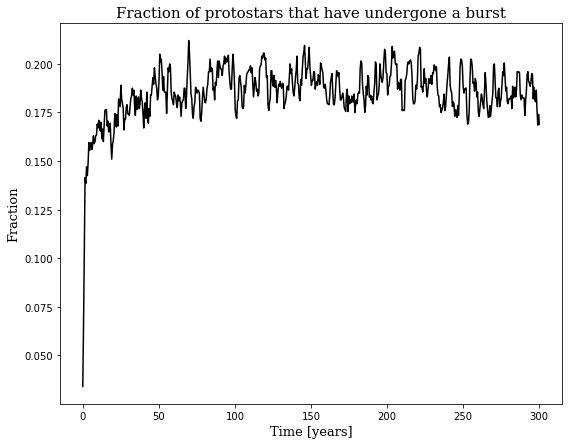

In [28]:
time=np.linspace(0,t,steps)
text="t={} years".format(t)
title='Fraction of protostars that have undergone a burst'
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction,color='black')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title,font='serif',fontsize=15)
#ax.text(t,0,text,font='serif',fontsize=12,ha='right')
#plt.savefig('/Users/rachellee/Desktop/fraction_5bursts_total.jpeg',dpi=300)

In [29]:
#find number of 3x, 10x, 30x, and 100x burst 
#determine total number of bursts 
total2=0
total10=0
total20=0
total50=0
total100=0
burst_total2=[]
burst_total10=[]
burst_total20=[]
burst_total50=[]
burst_total100=[]
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-0.8:
            total2+=1
        elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-2.5:
            total10+=1
        elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3.1:
            total20+=1
        elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4.25:
            total50+=1
        elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
            total100+=1
    burst_total2.append(total2)
    burst_total10.append(total10)
    burst_total20.append(total20)
    burst_total20.append(total50)
    burst_total100.append(total100)

In [30]:
burst_frac2=[]
frac_val2=0
burst_frac10=[]
frac_val10=0
burst_frac20=[]
frac_val20=0
burst_frac50=[]
frac_val50=0
burst_frac100=[]
frac_val100=0
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-0.8:
            frac_val2+=1
        elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-2.5:
            frac_val10+=1
        elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3.1:
            frac_val20+=1
        elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4.25:
            frac_val50+=1
        elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
            frac_val100+=1
    burst_frac2.append(frac_val2)
    frac_val2=0
    burst_frac10.append(frac_val10)
    frac_val10=0 
    burst_frac20.append(frac_val20)
    frac_val20=0
    burst_frac50.append(frac_val50)
    frac_val50=0
    burst_frac100.append(frac_val100)
    frac_val100=0 

In [31]:
fraction2=[]
fraction10=[]
fraction20=[]
fraction50=[]
fraction100=[]
for i in range(len(burst_frac10)):
    fraction2.append(burst_frac2[i]/cluster_size)
    fraction10.append(burst_frac10[i]/cluster_size)
    fraction20.append(burst_frac20[i]/cluster_size)
    fraction50.append(burst_frac50[i]/cluster_size)
    fraction100.append(burst_frac100[i]/cluster_size)

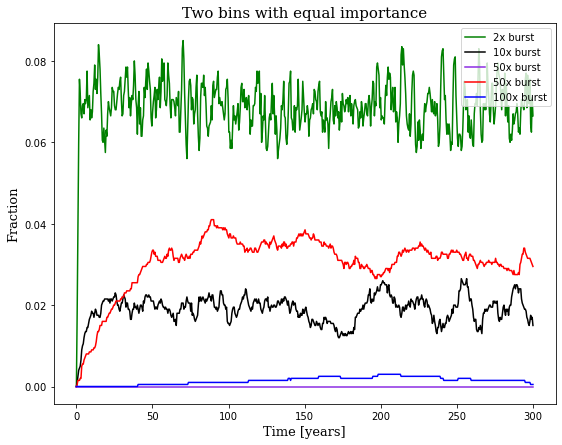

In [32]:
time=np.linspace(0,t,steps)
title='Two bins with equal importance'
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction2,color='green',label='2x burst')
ax.plot(time,fraction10,color='black',label='10x burst')
ax.plot(time,fraction20,color='blueviolet',label='50x burst')
ax.plot(time,fraction50,color='red',label='50x burst')
ax.plot(time,fraction100,color='blue',label='100x burst')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title,font='serif',fontsize=15)
plt.legend(loc='upper right')
#plt.savefig('/Users/rachellee/Desktop/fraction_5bursts_comparison.jpeg',dpi=300)

Text(0.5, 1.0, 'Five bins with equal importance, 100x burst')

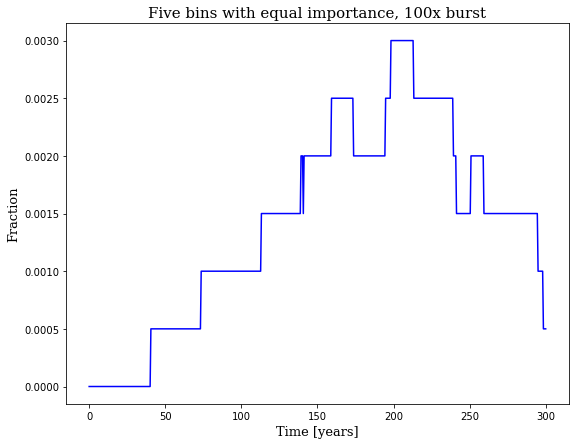

In [33]:
time=np.linspace(0,t,steps)
title='Five bins with equal importance, 100x burst'
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction100,color='blue',label='100x burst')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title,font='serif',fontsize=15)